### Àlex Correa Orri 1564967
### Júlia Pumares Benaiges 1566252

#### Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [167]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [233]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import os
import seaborn as sns
from scipy.stats import shapiro, spearmanr
import math
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipympl
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

### DIRECTORI DE TREBALL

In [169]:
os.getcwd()
#path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/pràctiques/PRÀCTICA 2/Practica2-Classificacio'
path = 'C:/Users/julia/Downloads'
os.chdir(path)
os.getcwd()
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### LECTURA DE DADES

In [170]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')

dataset_test = load_dataset('test.csv')

### 1- EDA

In [171]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200,0,1,0,7,0.600,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500,1,0,1,53,0.700,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500,1,2,1,41,0.900,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500,0,0,0,10,0.800,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200,0,13,1,44,0.600,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.500,1,3,0,22,0.700,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.700,0,4,1,10,0.800,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.500,1,0,0,24,0.800,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.500,0,0,0,53,0.700,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.600,1,2,1,9,0.100,93,5,...,1137,1224,513,19,10,12,1,0,0,0


#### Atributs

In [172]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Determinem com l'atribut objectiu el price_range (4 rangs de preu)

In [173]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

#### Correlacions amb l'atribut a predir (price_range)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
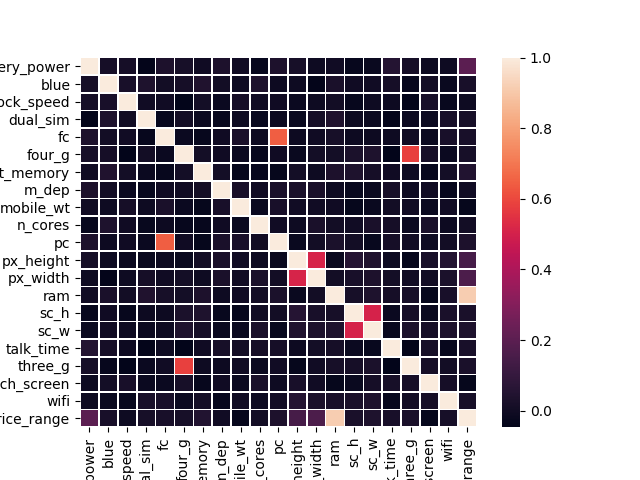

In [174]:
plt.figure()
ax = sns.heatmap(dataset.corr(), annot=False, linewidths=.5)

In [175]:
dataset.corr()['price_range']

battery_power    0.201
blue             0.021
clock_speed     -0.007
dual_sim         0.017
fc               0.022
four_g           0.015
int_memory       0.044
m_dep            0.001
mobile_wt       -0.030
n_cores          0.004
pc               0.034
px_height        0.149
px_width         0.166
ram              0.917
sc_h             0.023
sc_w             0.039
talk_time        0.022
three_g          0.024
touch_screen    -0.030
wifi             0.019
price_range      1.000
Name: price_range, dtype: float64

#### Dades amb distribució normal

In [176]:
c = 0
for col in dataset.columns:
    stat, p = shapiro(X[:,c])
    if p > 0.05:
        print(c)
        print(p)
        print(dataset.columns[c])
        print('------------------------')
    c += 1
#no tenim dades amb distribució normal

In [177]:
X = data[:, :l-1]

#### Scatter plot dels atributs més correlacionats (ram i battery_power) amb price_range

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
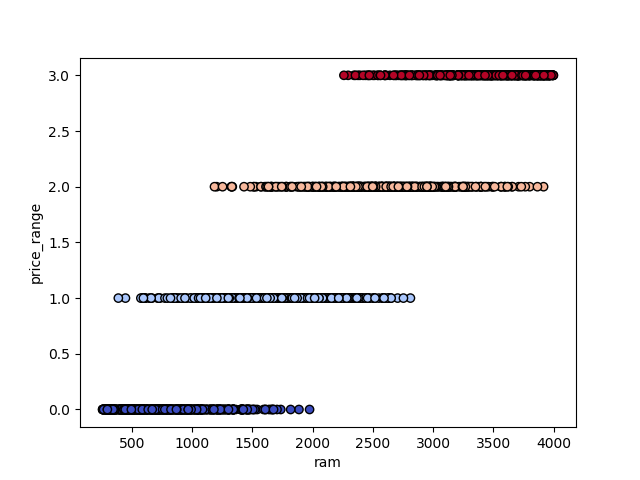

In [178]:
n_classes = 4
    
plt.figure()
plt.xlabel("ram")
plt.ylabel("price_range")
plt.scatter(X[:,13], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
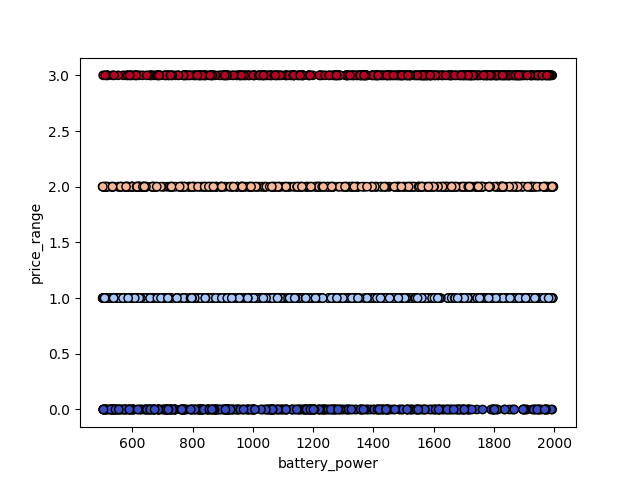

In [179]:
plt.figure()
plt.xlabel("battery_power")
plt.ylabel("price_range")
plt.scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

In [180]:
#no va???
sns.distplot(X[:,8])

#### Dades binàries

In [181]:
bool_cols = [col for col in dataset if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]
bool_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

#### Les resta de dades són numèriques (enteres o decimals), no tenim categòriques

### 2- Preprocessing

#### Provem si val la pena tenir amplada i alçada o podem utilitzar la mida de la diagonal. Creem atribut nou, px_diag

In [182]:
dataset['px_diag'] = (dataset['px_height']**2+dataset['px_width']**2)**(1/2)
dataset = dataset.drop(['px_width','px_height'],axis=1)
data = dataset.values
l = len(dataset.columns)
X = data[:, :l-1] 
y = data[:, dataset.columns.get_loc('price_range')]

In [183]:
dataset.corr()['price_range']

battery_power    0.201
blue             0.021
clock_speed     -0.007
dual_sim         0.017
fc               0.022
four_g           0.015
int_memory       0.044
m_dep            0.001
mobile_wt       -0.030
n_cores          0.004
pc               0.034
ram              0.917
sc_h             0.023
sc_w             0.039
talk_time        0.022
three_g          0.024
touch_screen    -0.030
wifi             0.019
price_range      1.000
px_diag          0.180
Name: price_range, dtype: float64

#### Creem dataset1 amb els atributs més correlacionats

In [184]:
dataset1 = dataset[cols_corr]
data1 = dataset1.values
l1 = len(dataset1.columns)
X1 = data1[:, :l1-1] 
#y1 = data1[:, dataset1.columns.get_loc('price_range')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
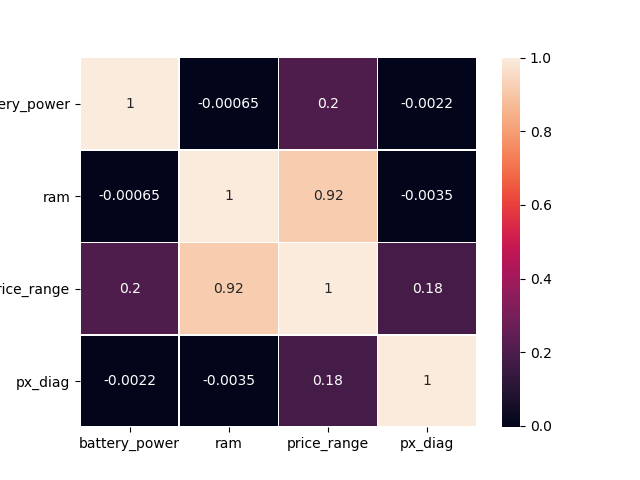

In [185]:
plt.figure()
ax = sns.heatmap(dataset1.corr(), annot=True, linewidths=.5)

#### Normalitzar

In [186]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [187]:
Xn = standarize(X)
X1n = standarize(X1)

#### No tenim valors NaN

In [188]:
dataset.isnull().values.any()

False

#### Pairplot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
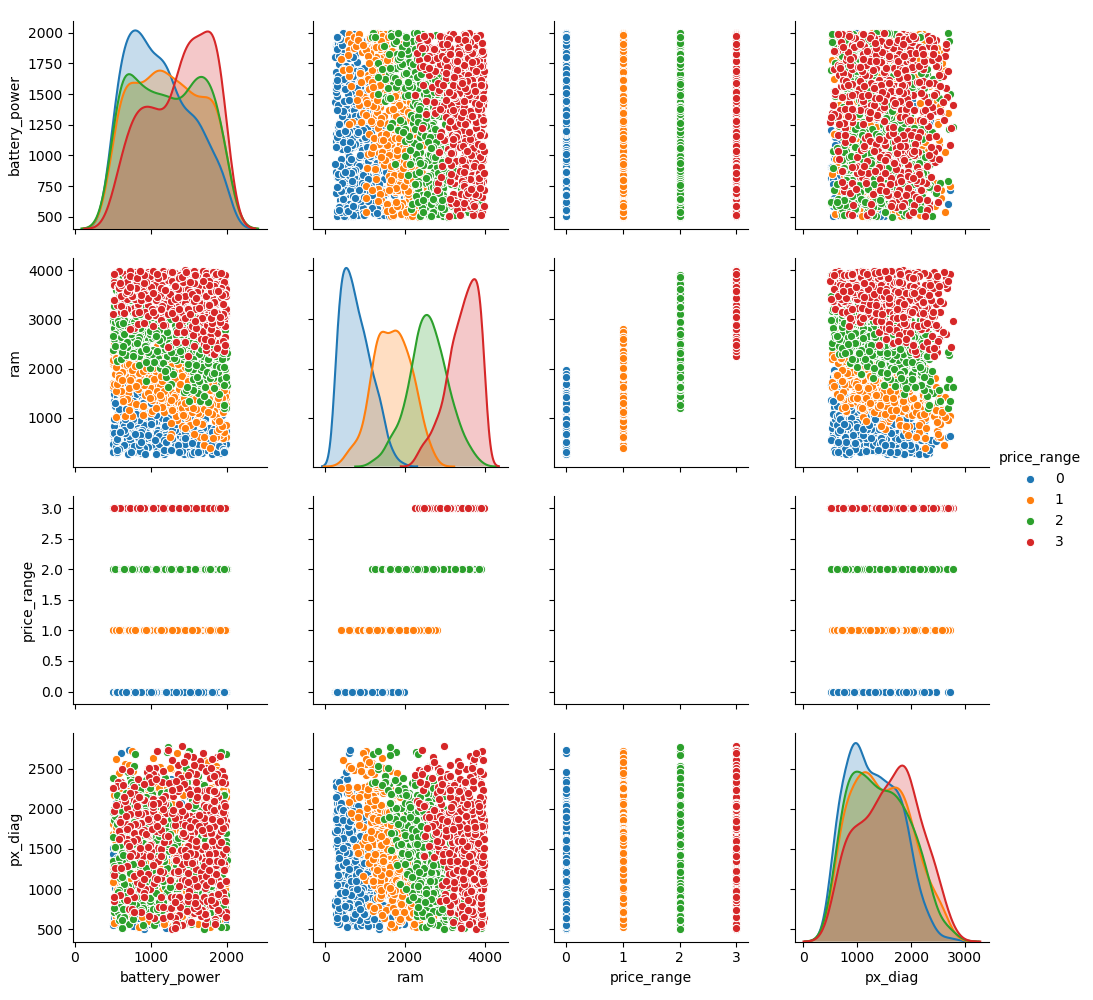

In [189]:
sns.pairplot(dataset1, hue='price_range')

### 3- Model Selection

In [190]:
def models(X, y):
    particions = [0.5, 0.7, 0.8]
    for part in particions:
        print("PART: "+str(part)+" %")
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part, stratify=y)

        #Regresor logístic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
        logireg.fit(x_t, y_t)
        print ("Correct classification Logistic:           ", logireg.score(x_v, y_v))

        #SVM
        svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
        svc.fit(x_t, y_t)
        probs = svc.predict_proba(x_v)
        print ("Correct classification SVM:                ", svc.score(x_v, y_v))

        #DecisionTree
        clft = DecisionTreeClassifier(random_state=0, max_depth=2)
        clft.fit(x_t, y_t)
        print ("Correct classification Decision Tree:      ", clft.score(x_v, y_v))

        #perceptron
        clf = Perceptron(tol=1e-3, random_state=0)
        clf.fit(x_t, y_t)
        print ("Correct classification Perceptron:         ", clf.score(x_v, y_v))

        #KNeighbors
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(x_t, y_t) 
        print ("Correct classification KNeighbors:         ", neigh.score(x_v, y_v))

        bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
        bagging.fit(x_t, y_t)
        print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))

        adaB = AdaBoostClassifier(n_estimators=100)
        adaB.fit(x_t, y_t)
        print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))

        print("-------------------------------------------------------------------")

#### Amb tots els atributs

In [191]:
models(X,y)

PART: 0.5 %
Correct classification Logistic:            0.802
Correct classification SVM:                 0.268
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.408
Correct classification KNeighbors:          0.783
Correct classification Bagging KNeighbors:  0.73
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:            0.7566666666666667
Correct classification SVM:                 0.275
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.42
Correct classification KNeighbors:          0.7833333333333333
Correct classification Bagging KNeighbors:  0.7233333333333334
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:            0.755
Correct classification SVM:                 0.2

#### Amb els atributs més correlacionats

In [192]:
models(X1, y)

PART: 0.5 %
Correct classification Logistic:            0.5
Correct classification SVM:                 0.254
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.435
Correct classification KNeighbors:          0.769
Correct classification Bagging KNeighbors:  0.924
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:            0.5183333333333333
Correct classification SVM:                 0.25333333333333335
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.2916666666666667
Correct classification KNeighbors:          0.7733333333333333
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:            0.4925
Correct classification SVM:       

#### Amb dades normalitzades (tots els atributs)

In [193]:
models(Xn, y)

PART: 0.5 %
Correct classification Logistic:            0.897
Correct classification SVM:                 0.462
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.742
Correct classification KNeighbors:          0.585
Correct classification Bagging KNeighbors:  0.774
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:            0.9233333333333333
Correct classification SVM:                 0.4483333333333333
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.705
Correct classification KNeighbors:          0.625
Correct classification Bagging KNeighbors:  0.7183333333333334
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:            0.9575
Correct classification SVM:                 

#### Amb els atributs correlacionats i normalitzats

In [194]:
models(X1n, y)

PART: 0.5 %
Correct classification Logistic:            0.978
Correct classification SVM:                 1.0
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.75
Correct classification KNeighbors:          1.0
Correct classification Bagging KNeighbors:  0.996
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:            0.9683333333333334
Correct classification SVM:                 1.0
Correct classification Decision Tree:       1.0
Correct classification Perceptron:          0.6266666666666667
Correct classification KNeighbors:          1.0
Correct classification Bagging KNeighbors:  0.7933333333333333
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:            1.0
Correct classification SVM:                 1.0
Correct 

### 4- Cross Validation

In [195]:
#sorted(sklearn.metrics.SCORERS.keys())

In [196]:
def cross_validation(regression, n_folds):
    scores = cross_val_score(regression, X1, y, cv=n_folds)
    print ("Scores      :  ", scores)
    print ("Scores Mean :  ", scores.mean())
    print ("Scores std  :  ", scores.std())

In [197]:
folds = 5

print("LogisticRegression:")
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
cross_validation(logireg, folds)

print("\nKNeighborsClassifier:")
neigh = KNeighborsClassifier(n_neighbors=3)
cross_validation(neigh, folds)

print("\nBaggingClassifier:")
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
cross_validation(bagging, folds)



LogisticRegression:
Scores      :   [0.51   0.5075 0.51   0.51   0.4875]
Scores Mean :   0.505
Scores std  :   0.008803408430829508

KNeighborsClassifier:
Scores      :   [0.79   0.7825 0.7725 0.7775 0.785 ]
Scores Mean :   0.7815
Scores std  :   0.006041522986797314

BaggingClassifier:
Scores      :   [0.9925 0.835  0.99   0.9675 0.96  ]
Scores Mean :   0.9490000000000001
Scores std  :   0.05836522937503118


In [49]:
##TODO leave one out https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html 
#TOPEEE LEEENT
#cada iteracio agafa 1 test i tot lo altre train (en total són 2000 iteracions pq tenim 2000 files)
loo = LeaveOneOut()
loo.get_n_splits(X1)
for train_index, test_index in loo.split(X1):
    x_t, x_v = X1[train_index], X1[test_index]
    y_t, y_v = y[train_index], y[test_index]
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    print ("Correct classification Logistic: ", logireg.score(x_v, y_v))
    
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM: ", svc.score(x_v, y_v))
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    print ("Correct classification Decision Tree: ", clft.score(x_v, y_v))
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    print ("Correct classification Perceptron: ", clf.score(x_v, y_v))
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    print ("Correct classification KNeighbors: ", neigh.score(x_v, y_v))
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))

    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))
    
    
    print("-------------------------------------------------------------------")

Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:

Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-----------------------------------------------------------------

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correc

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  0.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  1.0
-------------------------------------------------------------------
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  0.0
Correct classification Perceptron:  1.0
Correct classi

KeyboardInterrupt: 

In [199]:
#com lo de dalt pero calcula la mitjana d'accuracy de cada particio
#TOPEEE LENT
loo = LeaveOneOut()
loo.get_n_splits(X1)
sum1=0
"""sum2=0
sum3=0
sum4=0
sum5=0
sum6=0
sum7=0
sum8=0"""
i=0
for train_index, test_index in loo.split(X1):
    x_t, x_v = X1[train_index], X1[test_index]
    y_t, y_v = y[train_index], y[test_index]
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    sum1 += logireg.score(x_v, y_v)
    """
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    sum2 += svc.score(x_v, y_v)
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    sum3 += clft.score(x_v, y_v)
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    sum4 +=  clf.score(x_v, y_v)
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    sum5 += neigh.score(x_v, y_v)
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    sum6 += bagging.score(x_v, y_v)

    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    sum7 += adaB.score(x_v, y_v)"""
    i += 1
    
print("-------------------------------------------------------------------")
print(sum1/i)
"""
print(sum2/i)
print(sum3/i)
print(sum4/i)
print(sum5/i)
print(sum6/i)
print(sum7/i)"""

-------------------------------------------------------------------
0.507


'\nprint(sum2/i)\nprint(sum3/i)\nprint(sum4/i)\nprint(sum5/i)\nprint(sum6/i)\nprint(sum7/i)'

### 5-Metrics Analysis

### Precision Recall nand ROC

In [ ]:
# per fer la precision-recall i roc primer cal entrenar un model 
# i apartir daqui es calcula, nidea de si esta be pero es el que fa el profe a lapartat anterior
# es pot probar amb les diferents x i els diferents models

In [222]:
x_t, x_v, y_t, y_v = train_test_split(Xn, y, train_size=0.8, stratify=y)
svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
svc.fit(x_t, y_t)
probs = svc.predict_proba(x_v) #aixo es necessita per precision-recall
print ("Correct classification SVM:                ", svc.score(x_v, y_v))

Correct classification SVM:                 0.4975


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
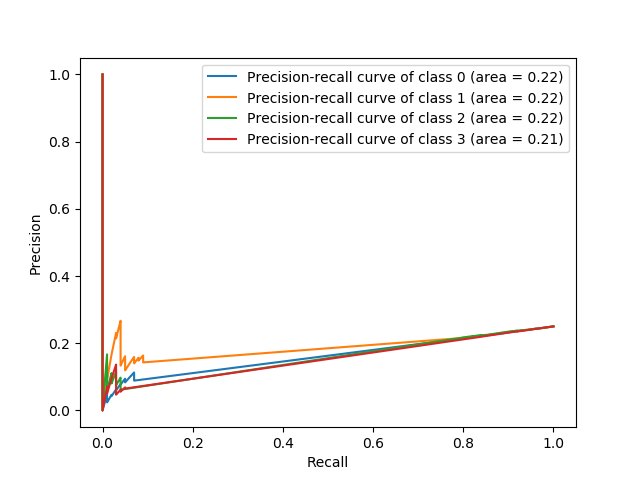

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
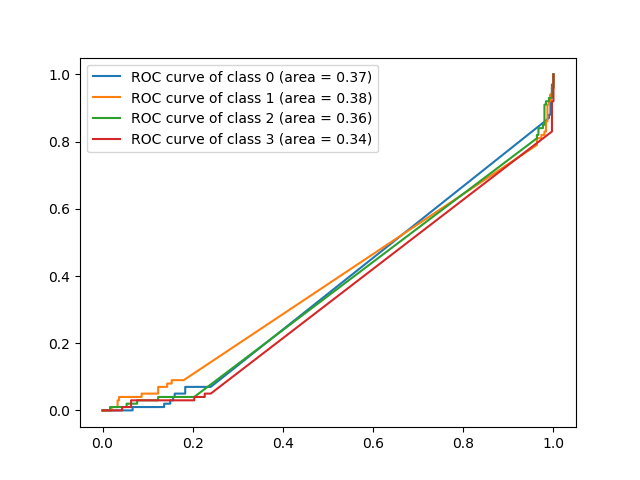

In [224]:
n_classes=4
# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

### Classification Reports

In [ ]:
#lo mismo que antes, primer entrenem un model i despres 'calculem' el report
#hem de pensar amb quina base de dades i amb quins models ho fem pq ferho amb tots its imposssible

In [231]:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.5, stratify=y)
#Regresor logístic
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
logireg.fit(x_t, y_t)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)

In [232]:
y_true = y_v
y_pred = logireg.predict(x_v)
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.90      0.87       250
     class 1       0.67      0.56      0.61       250
     class 2       0.66      0.60      0.63       250
     class 3       0.84      0.99      0.91       250

    accuracy                           0.76      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.75      0.76      0.75      1000



### 6- Hyperparameter Search